In [81]:
import pandas as pd
from prophet import Prophet
df = pd.read_csv('co2.csv')

col_key = 'Period'
col_value = 'Carbon Dioxide (ppm)'

df[col_key] = pd.to_datetime(df["Year"].apply(str) + "-" + df["Month"].apply(str))
df.dropna(subset = [col_value], inplace=True)

df1 = df[[col_key,col_value]].copy()
df1.rename(columns = {col_key:'ds',col_value:'y'}, inplace = True) 
df1.sort_values(by=['ds'])
m = Prophet()
m.fit(df1)

20:36:29 - cmdstanpy - INFO - Chain [1] start processing
20:36:29 - cmdstanpy - INFO - Chain [1] done processing


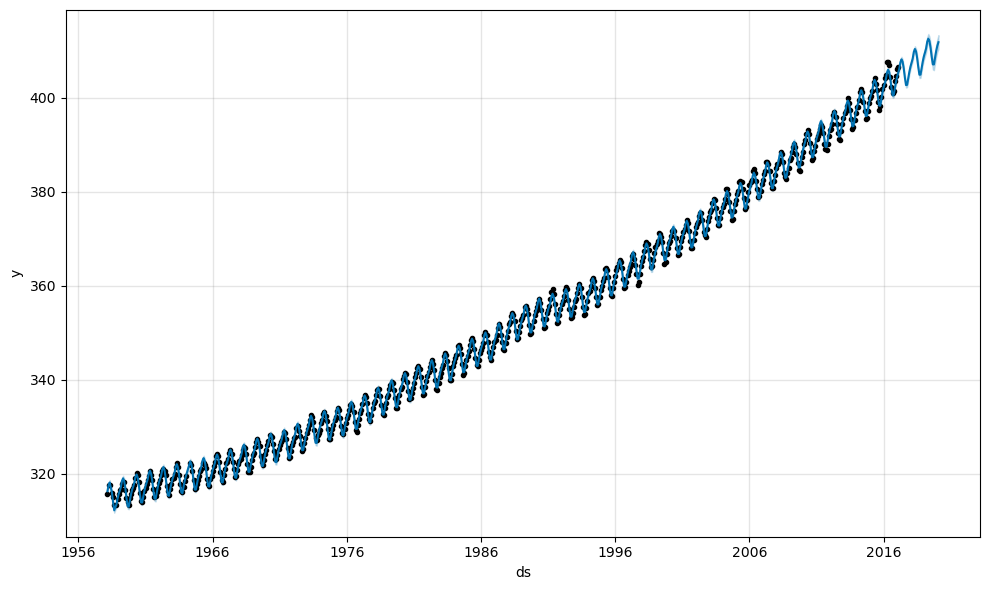

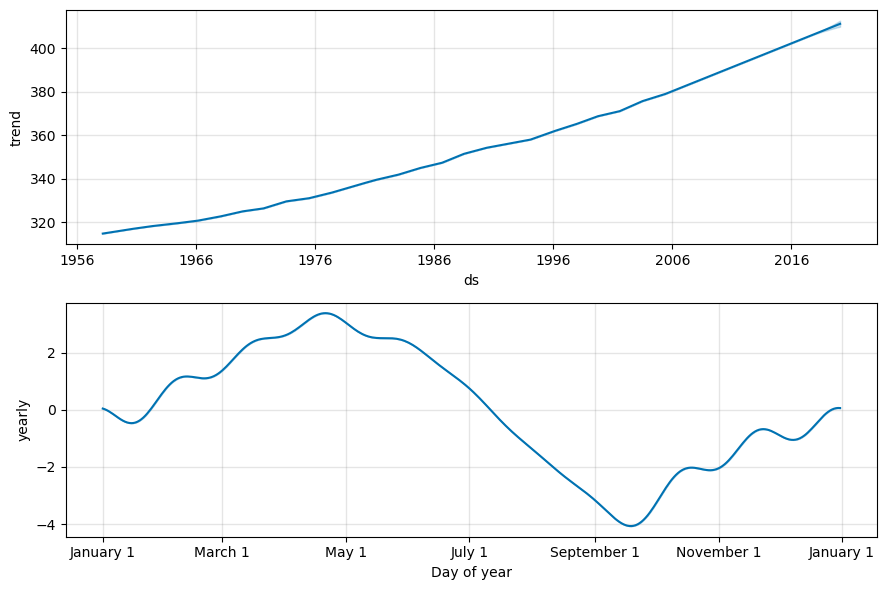

In [82]:
future = m.make_future_dataframe(periods = 36, freq = 'MS')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast, uncertainty=True)
fig2 = m.plot_components(forecast)